<a href="https://colab.research.google.com/github/Meanwhile-omkar/ML-Quest---Fake-Job-Check/blob/main/Quest_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello, Welcome to this Project by Omkar Haryan.
Topic- Fake Job Classification Model.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("job_train.csv")

In [ ]:
data.head()

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
0,Architect (Middleware - MQ) - Kuwait,"KW, KU,","On behalf of our client, a well known multinat...",-Working technical knowledge of IT systems and...,0,1,0,0
1,Interviewing Now for Sales Rep Positions -- wi...,"US, TX, Corpus Christi","We are Argenta Field Solutions, a rapidly expa...",#NAME?,0,1,0,0
2,Process Controls Staff Engineer - Foxboro I/A ...,"US, TX, USA Southwest",Experienced Process Controls Staff Engineer is...,At least 10 years of degreed professional expe...,0,0,0,0
3,Experienced Telemarketer Wanted - Digital Solu...,"AU, NSW,",If you have a passion for people and love to s...,"Responsibilities - Prospecting, following up a...",0,1,0,0
4,Senior Network Engineer,"GB, ENG, London",As the successful Senior Network Engineer you ...,Essential skills:•Juniper switching/routing/se...,0,1,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             8940 non-null   object
 1   location          8783 non-null   object
 2   description       8939 non-null   object
 3   requirements      7614 non-null   object
 4   telecommuting     8940 non-null   int64 
 5   has_company_logo  8940 non-null   int64 
 6   has_questions     8940 non-null   int64 
 7   fraudulent        8940 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 558.9+ KB


In [ ]:
data.value_counts()  # exploring the rows thoroughly to get complete info about a posting

title                                                                location           description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           requirements                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [ ]:
data['fraudulent'].value_counts()  # no. of fraud posts in training dataset is very very less

,count
fraudulent,
0,8484
1,456


In [ ]:
data[data['fraudulent'] == 1].value_counts() # checking complete details of fraud postings

title                                                            location                 description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   requirements                                                                                                                                                                                                                                                                            

In [ ]:
data.isnull().sum()

,0
title,0
location,157
description,1
requirements,1326
telecommuting,0
has_company_logo,0
has_questions,0
fraudulent,0


In [ ]:
data.dropna(subset=['location'], inplace=True) #dropping the rows with null values in location column as it is very less in number compared to total entries in dataset

In [ ]:
data.dropna(subset=['description'], inplace=True) # dropping rows for null values in description as well

In [ ]:
# getting most common fraud descriptions
data[data['fraudulent'] == 1]['description'].value_counts()

,count
description,
ACCEPTING ONLINE APPLICATIONS ONLYClick Here To Apply This is a Full Time Temporary Position Lasting for 2 yearsDescriptionValidate and review legal contractual agreements for customers Input contract into contract databases All contracts completed &amp; reviewed within per-determined service level agreement Professional e-mail interaction with customers Scanning and uploading of documents QualificationsHigh School Diploma or Equivalent Professional Communication Skills via e-mail interactionDedicated to the needs of the business Project management skills to assist in facilitating multiple contract rejects Detail oriented Able to multi-taskAbility to work with time sensitive documents Must be able to work independently but able to perform in a team environment when needed. Fast and accurate typist ACCEPTING ONLINE APPLICATIONS ONLYClick Here To Apply,15
"We are seeking individuals to be connected with companies who are hiring employees directly to work from their homes. You will find both full-time and part-time opportunities in a variety of career fields including but not limited to: data entry, customer support, billing, typing, and administrative.These positions guarantee wages ranging from $12 per hour up to six figure salary. This includes bonuses, benefits, and flexibility over your work schedule.Legitimate work from home jobs are going to require that you have skills relevant to the position you’re applying for. Training is provided based on the position.",12
"We have several openings available in this area earning $1000.00-$2500.00 per week. We are seeking only honest, self-motivated people with a desire to work in the home typing and data entry field, from the comfort of their own homes.The preferred applicants should be at least 18 years old with Internet access. No experience is needed. However the following skills are desirable:",12
"We provide No Credit Check Financing to customers of Small and Medium size Businesses and can help 90% of the industries from Auto Mechanics to Dentists and Lawyers.We are seeking skilled Account Managers to grow with us and help us achieve our goals in this new and exciting industry.This is designed as a long-term position for an entrepreneurial individual to really build their book of business, along with their income.Our people enjoy a flexible work environment. High earnings with great incentives like corporate retreats and quick advancement opportunities.",12
"We are a full-service marketing and staffing firm, serving companies ranging from Fortune 100 to new start-up organizations. We work with job seekers in an equally broad range, from light industrial temporary workers to executive level candidates.Are you looking for a Work from Home Opportunity where you can earn up to $2500 and more per week? Our Online Service Representative position would be perfect for you!- Set your own hours - Make money every time you decide to work - Work remotely from home - Get paid weekly - If you have a computer with internet, this is for you",10
...,...
"The maintenance supervisor is responsible for planning, overseeing and reporting the work of maintenance staff to ensure safe and efficient operations of the facility. Responsible for making sure maintence staff and groundskeepers are tasked with the upkeep of buildings, grounds and any materials or machinery needed to maintain the facility. Weekly logs and reports of daily maintenance issues must be kept and recorded. In addition to directing the work of subordinates, the maintenance supervisor may also be required to assist with maintenance duties, or take over if a maintenace worker is absent or unavailable.",1
"Alliance is a Nationwide Business Services provider (California) based, nationally established credit card processor looking for MONEY MOTIVATED outside sales reps to close pre-confirmed appointments. We will provide for you 2-6 confirmed leads daily. Sales reps are expected to be on time to the pre set #URL_0885a6

In [ ]:
data.isnull().sum()

,0
title,0
location,0
description,0
requirements,1249
telecommuting,0
has_company_logo,0
has_questions,0
fraudulent,0


The null values of Requirements column equates to approx. 15% of data, so we cannot compromise on deleting those rows as the data set is also small.

In [ ]:
data['requirements'].fillna("No requirements specified", inplace=True)

So we generalised it will our input as "no requirements specified"

In [ ]:
data.isnull().sum()  # data is ready with 0 null values

,0
title,0
location,0
description,0
requirements,0
telecommuting,0
has_company_logo,0
has_questions,0
fraudulent,0


In [ ]:
data.duplicated().sum()

105

In [ ]:
data.drop_duplicates(inplace=True) # dropped duplicate entries

The data is perfectly cleaned now.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8677 entries, 0 to 8939
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             8677 non-null   object
 1   location          8677 non-null   object
 2   description       8677 non-null   object
 3   requirements      8677 non-null   object
 4   telecommuting     8677 non-null   int64 
 5   has_company_logo  8677 non-null   int64 
 6   has_questions     8677 non-null   int64 
 7   fraudulent        8677 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 610.1+ KB


There is a small error in the indexing of the dataset as we removed some rows with null values.

In [ ]:
data.reset_index(drop=True, inplace=True) # indexing corrected !

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8677 entries, 0 to 8676
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             8677 non-null   object
 1   location          8677 non-null   object
 2   description       8677 non-null   object
 3   requirements      8677 non-null   object
 4   telecommuting     8677 non-null   int64 
 5   has_company_logo  8677 non-null   int64 
 6   has_questions     8677 non-null   int64 
 7   fraudulent        8677 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 542.4+ KB


For making a model through dataset which is textual, preprocessing of test is neccessary !!
We will be doing :

1.   Normslization
2.   Tokenization
3.   Lemmatization
4.   Removing Stopwords but only which are of 2 letters, as words like apply , job, urgent, hiring... can be precious for detecting fake posts





In [ ]:
# normalizing the text
text_cols = ['title', 'location', 'description', 'requirements']
for col in text_cols:
  data[col] = data[col].str.lower()

In [ ]:
!pip install nltk

In [ ]:
# tokenizing the text

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

def tokenize_text(text):
  return word_tokenize(text)

text_cols = ['title', 'location', 'description', 'requirements']
for col in text_cols:
  data[col] = data[col].apply(tokenize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
 #  lemmatizing the tokens so that we can reduce the words to their base form

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
  return [lemmatizer.lemmatize(token) for token in tokens]

text_cols = ['title', 'location', 'description', 'requirements']
for col in text_cols:
  data[col] = data[col].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from nltk.probability import FreqDist

all_tokens = []
for col in text_cols:
  for tokens in data[col]:
    all_tokens += tokens

fdist = FreqDist(all_tokens)

In [ ]:
from nltk import ngrams

# Combine all text data into a single string
all_text = ' '.join([' '.join(tokens) for col in text_cols for tokens in data[col]])

# Generate n-grams for words
words = ngrams(all_text.split(), 1)

# Calculate frequency distribution for two-letter words
fdist_two_letter = FreqDist(word[0] for word in words if len(word[0]) == 2)

# Print the frequency distributions
print("Two-letter words:")
for word, freq in fdist_two_letter.items():
    print(word, freq)


Two-letter words:
mq 7
-- 475
tx 629
hr 635
io 634
in 41913
b2 1
na 119
of 50159
sr 42
to 70702
an 10094
ax 15
on 12282
pr 313
pf 3
la 123
nv 85
it 5428
ny 769
uw 5
bi 372
ca 1519
al 92
tv 86
id 97
st 33
3d 184
ui 381
ux 396
or 14128
at 6156
er 14
rn 71
ct 90
ut 71
's 2768
gp 9
il 286
'd 100
qa 393
no 2221
nm 19
ft 15
me 99
22 29
oh 216
ad 490
rf 10
az 110
vp 127
li 4
rd 10
pt 44
ii 108
w/ 32
dc 258
qc 48
eu 24
cs 511
3+ 189
m5 1
en 226
de 390
pa 208
by 5174
10 349
nj 144
up 2593
ap 38
sf 32
fl 263
bw 41
wa 323
bo 6
15 141
am 212
uk 373
fe 15
nz 217
ky 58
l1 5
/c 2
se 59
// 14
wi 86
tn 83
em 22
so 1267
ci 24
sa 85
fp 11
18 142
`` 426
'' 955
45 29
co 84
os 21
50 311
bd 6
iv 13
db 48
mi 187
ag 26
is 18043
wv 25
va 295
nw 22
fx 4
|| 3
4+ 83
wy 8
tp 12
md 83
ic 29
mt 26
fr 37
as 13
we 14173
gi 88
2x 4
ie 102
nl 72
nc 154
le 169
kl 4
ip 88
ia 66
ba 49
gl 7
be 15686
pp 6
sw 47
l3 6
gm 26
jr 12
.. 102
cm 148
qi 3
ha 1804
da 18
12 457
pm 168
m1 2
x3 1
au 113
du 24
mo 83
11 34
vb 11
x2 1
mm 12


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt')
nltk.download('wordnet')

# Assuming 'data' is your DataFrame

# Function to remove words shorter than the specified length
def remove_short_words(tokens, min_length=3):
    return [token for token in tokens if len(token) >= min_length]

text_cols = ['title', 'description', 'requirements']

# Tokenize and lemmatize text data
lemmatizer = WordNetLemmatizer()
for col in text_cols:
    # Ensure the column is of string type and handle NaN values
    data[col] = data[col].fillna('').astype(str)
    data[col] = data[col].apply(lambda x: [lemmatizer.lemmatize(word) for word in word_tokenize(x)])

# Remove short words (two letters or fewer)
for col in text_cols:
    data[col] = data[col].apply(lambda tokens: remove_short_words(tokens, min_length=3))

# 'data' is now updated with two-letter words removed

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data.head()

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
0,"['architect, 'middleware, 'mq, 'kuwait]","[kw, ,, ku, ,]","['on, 'behalf, 'of, 'our, 'client, 'well, 'kno...","['-working, 'technical, 'knowledge, 'of, 'it, ...",0,1,0,0
1,"['interviewing, 'now, 'for, 'sale, 'rep, 'posi...","[u, ,, tx, ,, corpus, christi]","['we, 'are, 'argenta, 'field, 'solution, 'rapi...",['name],0,1,0,0
2,"['process, 'control, 'staff, 'engineer, 'foxbo...","[u, ,, tx, ,, usa, southwest]","['experienced, 'process, 'control, 'staff, 'en...","['at, 'least, '10, 'year, 'of, 'degreed, 'prof...",0,0,0,0
3,"['experienced, 'telemarketer, 'wanted, 'digita...","[au, ,, nsw, ,]","['if, 'you, 'have, 'passion, 'for, 'people, 'a...","['responsibility, 'prospecting, 'following, 'u...",0,1,0,0
4,"['senior, 'network, 'engineer]","[gb, ,, eng, ,, london]","['the, 'successful, 'senior, 'network, 'engine...","['essential, 'skill, '•juniper, 'switching/rou...",0,1,0,0


In [ ]:
for col in text_cols:
    data[col] = data[col].apply(lambda tokens: ' '.join(tokens))

In [ ]:
data['description'][0] # we are getting some ' punctuation before every word so removing them is must

"'on 'behalf 'of 'our 'client 'well 'known 'multinational 'retail 'company 'based 'in 'kuwait 'we 'are 'seeking 'for 'an 'architect.the 'architect 'role 'is 'to 'ensure 'that 'the 'performance 'obligation 'of 'in-house 'it 'application 'middleware 'database 'and 'web 'system 'are 'met 'you 'will 'support 'and 'administer 'all 'it 'system 'mainly 'focusing 'on 'running 'operating 'and 'maintaining 'the 'application 'suite 'oracle 'and 'jboss 'middleware 'fiorano 'mq 'boomi 'database 'oracle 'ms-sql 'and 'mysql 'and 'web 'platform 'tomcat 'apache 'and 'ii 'and 'associated 'system 'and 'software 'specifically '-overseeing 'the 'installation 'configuration 'maintenance 'and 'troubleshooting 'of 'related 'system 'and 'software.-monitoring 'and 'testing 'system 'performance 'and 'providing 'performance 'statistic 'and 'reports-scheduling 'and 'performing 'improvement 'and 'upgrade"

In [ ]:
for col in text_cols:
    # Use regex to replace single quotes preceding word characters
    data[col] = data[col].str.replace(r"'(?=\w)", '', regex=True)

# Remove unwanted leading single quotes

print(data['description'][0])

on behalf of our client well known multinational retail company based in kuwait we are seeking for an architect.the architect role is to ensure that the performance obligation of in-house it application middleware database and web system are met you will support and administer all it system mainly focusing on running operating and maintaining the application suite oracle and jboss middleware fiorano mq boomi database oracle ms-sql and mysql and web platform tomcat apache and ii and associated system and software specifically '-overseeing the installation configuration maintenance and troubleshooting of related system and software.-monitoring and testing system performance and providing performance statistic and reports-scheduling and performing improvement and upgrade


In [ ]:
data.head()

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
0,architect middleware mq kuwait,"[kw, ,, ku, ,]",on behalf of our client well known multination...,'-working technical knowledge of it system and...,0,1,0,0
1,interviewing now for sale rep position with ma...,"[u, ,, tx, ,, corpus, christi]",we are argenta field solution rapidly expandin...,name,0,1,0,0
2,process control staff engineer foxboro i/a tri...,"[u, ,, tx, ,, usa, southwest]",experienced process control staff engineer is ...,at least 10 year of degreed professional exper...,0,0,0,0
3,experienced telemarketer wanted digital solution,"[au, ,, nsw, ,]",if you have passion for people and love to sel...,responsibility prospecting following up and le...,0,1,0,0
4,senior network engineer,"[gb, ,, eng, ,, london]",the successful senior network engineer you mus...,essential skill '•juniper switching/routing/se...,0,1,0,0


We have processed the text in Title, description, requirements column now we will process the location column

In [ ]:
data['location'][3]

['au', ',', 'nsw', ',']

In [ ]:
# Function to join tokens back into a sentence
def join_tokens(tokens):
    # Join tokens into a single string
    text = ' '.join(tokens)
    # Remove spaces before commas
    text = text.replace(' ,', ',')
    # Remove spaces before periods
    text = text.replace(' .', '.')
    # Remove spaces before other punctuation marks
    text = text.replace(' !', '!').replace(' ?', '?')
    return text

# Apply the function to the 'location' column
data['location'] = data['location'].apply(join_tokens)

# Now, check the location of the first row
print(data['location'][0])

kw, ku,


In [ ]:
data['location'][10]

'u, ca, long beach'

# Finally, we have completed the text pre processing

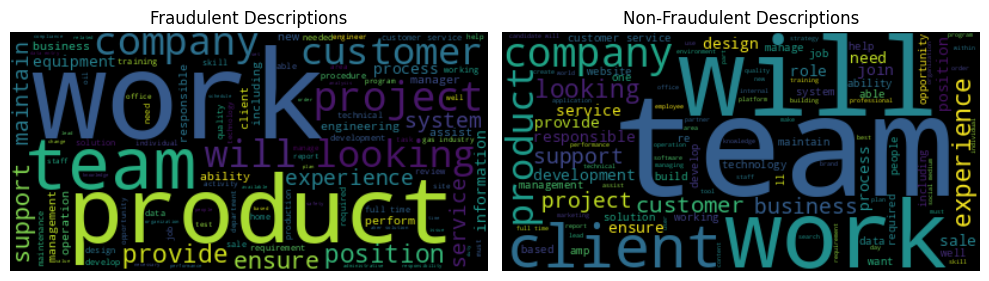

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Create separate DataFrames for fraudulent and non-fraudulent descriptions
fraudulent_desc = data[data['fraudulent'] == 1]['description']
non_fraudulent_desc = data[data['fraudulent'] == 0]['description']

# Generate word clouds
wc_fraudulent = WordCloud(background_color="black", max_words=100, stopwords=STOPWORDS)
wc_fraudulent.generate(' '.join(fraudulent_desc))

wc_non_fraudulent = WordCloud(background_color="black", max_words=100, stopwords=STOPWORDS)
wc_non_fraudulent.generate(' '.join(non_fraudulent_desc))

# Display word clouds side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(wc_fraudulent, interpolation='bilinear')
axes[0].axis("off")
axes[0].set_title("Fraudulent Descriptions")

axes[1].imshow(wc_non_fraudulent, interpolation='bilinear')
axes[1].axis("off")
axes[1].set_title("Non-Fraudulent Descriptions")

plt.tight_layout()
plt.show()

We can observe from the word clouds that there isn't a significant difference in the most frequent words used in fraudulent and non-fraudulent job descriptions. This suggests that fraudulent job postings often mimic the language and keywords used in legitimate job ads to deceive potential applicants

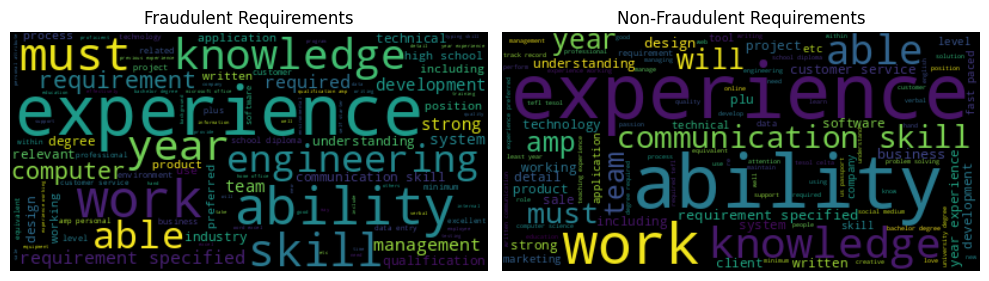

In [ ]:
# Create separate DataFrames for fraudulent and non-fraudulent requirements
fraudulent_reqs = data[data['fraudulent'] == 1]['requirements']
non_fraudulent_reqs = data[data['fraudulent'] == 0]['requirements']

# Generate word clouds with black background
wc_fraudulent = WordCloud(background_color="black", max_words=100, stopwords=STOPWORDS, width=400, height=200)
wc_fraudulent.generate(' '.join(fraudulent_reqs))

wc_non_fraudulent = WordCloud(background_color="black", max_words=100, stopwords=STOPWORDS, width=400, height=200)
wc_non_fraudulent.generate(' '.join(non_fraudulent_reqs))

# Display word clouds side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(wc_fraudulent, interpolation='bilinear')
axes[0].axis("off")
axes[0].set_title("Fraudulent Requirements")

axes[1].imshow(wc_non_fraudulent, interpolation='bilinear')
axes[1].axis("off")
axes[1].set_title("Non-Fraudulent Requirements")

plt.tight_layout()
plt.show()


In requirements also we can see the fraud postings are very well mimicked just like genuine post.

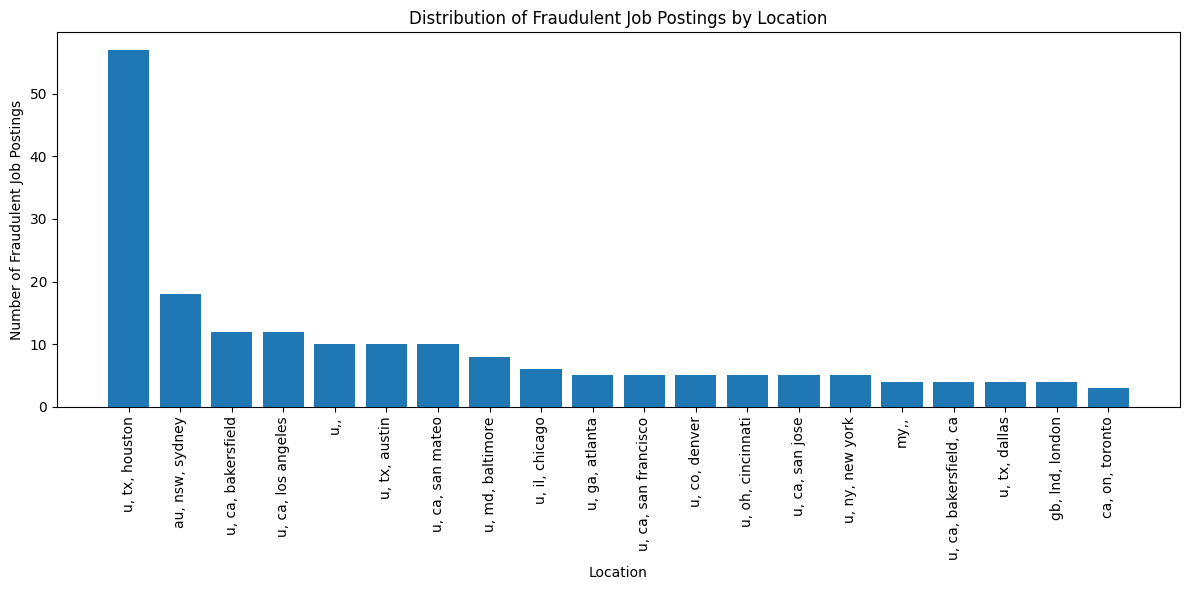

In [ ]:
import matplotlib.pyplot as plt

# Group by location and count fraudulent postings
location_fraud = data.groupby('location')['fraudulent'].sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(location_fraud.index[:20], location_fraud.values[:20])  # Show top 20 locations
plt.xticks(rotation=90)
plt.xlabel("Location")
plt.ylabel("Number of Fraudulent Job Postings")
plt.title("Distribution of Fraudulent Job Postings by Location")
plt.tight_layout()
plt.show()


Houston has a significantly higher number of fraudulent job postings, possibly due to a higher concentration of target companies, increased online job-seeking activity, previously successful scams, or data bias.

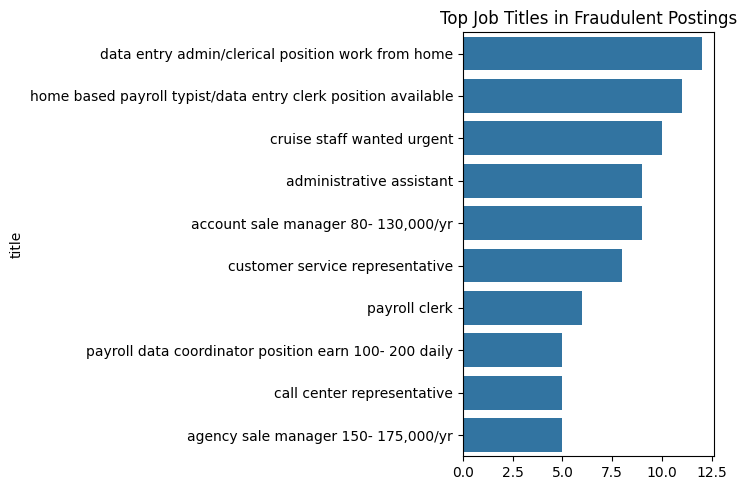

In [ ]:
# Top job titles for fraudulent jobs
fraudulent_titles = data[data['fraudulent'] == 1]['title'].value_counts().head(10)

# Top job titles for non-fraudulent jobs
non_fraudulent_titles = data[data['fraudulent'] == 0]['title'].value_counts().head(10)

# Plot the bar chart
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.barplot(x=fraudulent_titles.values, y=fraudulent_titles.index)
plt.title('Top Job Titles in Fraudulent Postings')
plt.tight_layout()
plt.show()

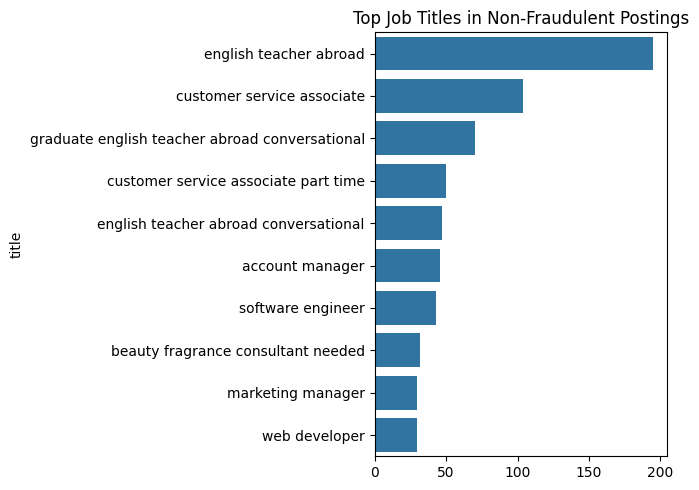

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 2)
sns.barplot(x=non_fraudulent_titles.values, y=non_fraudulent_titles.index)
plt.title('Top Job Titles in Non-Fraudulent Postings')

plt.tight_layout()
plt.show()

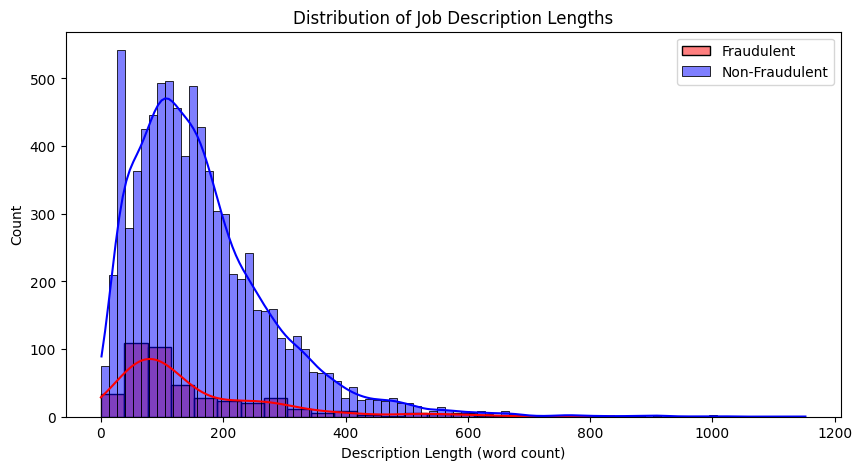

In [ ]:
# Calculate the length of job descriptions
data['description_length'] = data['description'].apply(lambda x: len(x.split()))

# Plot histograms
plt.figure(figsize=(10, 5))
sns.histplot(data[data['fraudulent'] == 1]['description_length'], color='red', label='Fraudulent', kde=True)
sns.histplot(data[data['fraudulent'] == 0]['description_length'], color='blue', label='Non-Fraudulent', kde=True)
plt.title('Distribution of Job Description Lengths')
plt.xlabel('Description Length (word count)')
plt.legend()
plt.show()

Fraudulent job postings tend to have shorter descriptions than non-fraudulent ones, possibly because scammers provide less detail to avoid suspicion or revealing inconsistencies in their fabricated job offers.

# We move forward to creation of our model

To build a model that can understand and process textual data, we need to convert the text into a numerical representation. This process is called vectorization.

In [ ]:
!pip install gensim

In [ ]:
from gensim.models import Word2Vec

# Combine text from all columns and split sentences into tokens
all_text = [sentence.split() for sentence in data['description'] + data['title'] + data['location'] + data['requirements']]

# Train a single model
model_combined = Word2Vec(sentences=all_text, vector_size=100, window=5, min_count=1, workers=4)



In [ ]:
 def get_avg_word2vec(tokens, model, vector_size):
       vectors = [model.wv[word] for word in tokens if word in model.wv]
       if vectors:
           return np.mean(vectors, axis=0)
       else:
           return np.zeros(vector_size)

In [ ]:
vector_size = 100

data['desc_vec'] = data['description'].apply(lambda x: get_avg_word2vec(x.split(), model_combined, vector_size))
data['title_vec'] = data['title'].apply(lambda x: get_avg_word2vec(x.split(), model_combined, vector_size))
data['loc_vec'] = data['location'].apply(lambda x: get_avg_word2vec(x.split(), model_combined, vector_size))
data['req_vec'] = data['requirements'].apply(lambda x: get_avg_word2vec(x.split(), model_combined, vector_size))

In [ ]:
data.head()

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent,description_length,desc_vec,title_vec,loc_vec,req_vec
0,architect middleware mq kuwait,"kw, ku,",on behalf of our client well known multination...,'-working technical knowledge of it system and...,0,1,0,0,109,"[0.48366177, 0.39369556, -1.1724983, 1.176112,...","[0.17975803, 0.46279022, -0.027692406, -0.0950...","[0.000655466, 0.0059211613, 0.029962117, -5.35...","[0.50810635, 0.7445791, -1.0735761, 0.7336329,..."
1,interviewing now for sale rep position with ma...,"u, tx, corpus christi",we are argenta field solution rapidly expandin...,name,0,1,0,0,112,"[0.48594132, 0.43980417, -0.36556953, 1.229378...","[1.3888347, 0.4721598, -0.4312321, 2.2545702, ...","[-0.1843189, 0.84328973, 0.62624484, -0.047493...","[-0.4100253, 0.122898914, 0.31677252, -0.25398..."
2,process control staff engineer foxboro i/a tri...,"u, tx, usa southwest",experienced process control staff engineer is ...,at least 10 year of degreed professional exper...,0,0,0,0,296,"[0.723433, 0.4407988, -1.2854339, 0.97950363, ...","[0.41643575, 0.53673387, -0.5983323, 0.4051643...","[-0.19332139, 0.8535582, 0.5151115, -0.1177007...","[0.7820874, 0.52458745, -1.0244682, 1.1281122,..."
3,experienced telemarketer wanted digital solution,"au, nsw,",if you have passion for people and love to sel...,responsibility prospecting following up and le...,0,1,0,0,80,"[1.409122, 0.4340492, -0.69998723, 1.1027131, ...","[0.90967834, 0.780035, -0.829851, 0.13681181, ...","[-0.24259737, 0.53268933, 0.617889, -0.0011431...","[1.06662, 0.6426983, -0.9446916, 1.081418, -0...."
4,senior network engineer,"gb, eng, london",the successful senior network engineer you mus...,essential skill '•juniper switching/routing/se...,0,1,0,0,104,"[1.1824837, 0.81028134, -1.1124623, 1.205261, ...","[1.5353609, 1.3255056, -1.0496652, 0.32324877,...","[0.42011705, 0.78495693, 0.13667956, -0.447766...","[0.42934728, 0.52576494, -0.8855634, 0.4327762..."


In [ ]:
data.columns

Index(['title', 'location', 'description', 'requirements', 'telecommuting',
       'has_company_logo', 'has_questions', 'fraudulent', 'description_length',
       'desc_vec', 'title_vec', 'loc_vec', 'req_vec'],
      dtype='object')

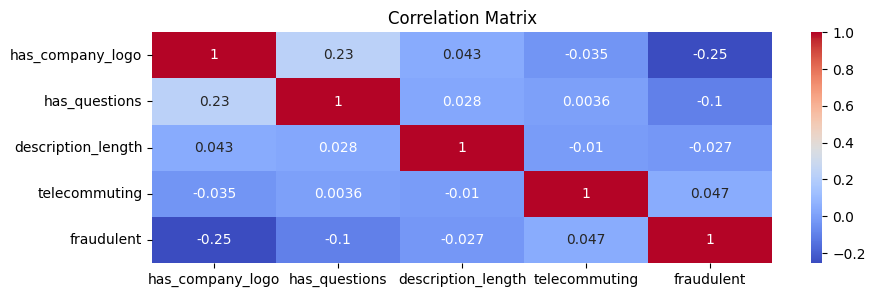

In [ ]:
numerical_features = ['has_company_logo', 'has_questions','description_length'
       , 'telecommuting']

data_for_heatmap = data[numerical_features + ['fraudulent']]

# Calculate the correlation matrix
corr = data_for_heatmap.corr()

# Create a heatmap
plt.figure(figsize=(10, 3))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The heatmap reveals that 'has_company_logo' and 'has_questions' have a notable negative correlation with fraudulent job postings, suggesting that fraudulent postings are less likely to include a company logo or screening questions.

However, there's no strong correlation between 'telecommuting' or 'description_length' and fraudulent activity, implying these features might not be strong indicators of fraud on their own.

#now we will start testing with different classification models

models :
 XGBoost,
LightGBM,
Random Forest,
Gradient Boosting Machine,
Support Vector Machine,
Logistic Regression.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = np.concatenate([
    np.array(data['desc_vec'].tolist()),
    np.array(data['title_vec'].tolist()),
    np.array(data['loc_vec'].tolist()),
    np.array(data['req_vec'].tolist())
], axis=1)

# Assuming your target variable column is named 'is_fraudulent'
y = data['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9596774193548387

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1655
           1       0.60      0.42      0.49        81

    accuracy                           0.96      1736
   macro avg       0.78      0.70      0.74      1736
weighted avg       0.95      0.96      0.96      1736


Confusion Matrix:
 [[1632   23]
 [  47   34]]


Though model has accuracy of 95% , but precision and recall are very weak for the fraudulent cases.....[1] 54% of the postings predicted as fraudulent were actually fraudulent....[2] the model only correctly identified 36% of the actual fraudulent postings

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.9631336405529954

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1655
           1       0.95      0.22      0.36        81

    accuracy                           0.96      1736
   macro avg       0.96      0.61      0.67      1736
weighted avg       0.96      0.96      0.95      1736


Confusion Matrix:
 [[1654    1]
 [  63   18]]


Same here, Only 22% of actual fraudulent postings were correctly identified.....so we cannot consider this as model as well


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier(random_state=42)

# Train the model
gbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbm_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9688940092165899

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1655
           1       0.83      0.42      0.56        81

    accuracy                           0.97      1736
   macro avg       0.90      0.71      0.77      1736
weighted avg       0.97      0.97      0.96      1736


Confusion Matrix:
 [[1648    7]
 [  47   34]]


We have slightly better results than previous models but still this is not the perfect fit.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9763824884792627

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1655
           1       1.00      0.49      0.66        81

    accuracy                           0.98      1736
   macro avg       0.99      0.75      0.82      1736
weighted avg       0.98      0.98      0.97      1736


Confusion Matrix:
 [[1655    0]
 [  41   40]]


we succeed in getting 0 false positives, that is 100% precision, but we arent crossing even 50% for detecting fraudulent postings.

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

# Initialize the LightGBM Classifier
lgb_model = lgb.LGBMClassifier(random_state=42, n_estimators=100, learning_rate=0.1)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgb_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 356, number of negative: 6585
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.174883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 101903
[LightGBM] [Info] Number of data points in the train set: 6941, number of used features: 400
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.051289 -> initscore=-2.917619
[LightGBM] [Info] Start training from score -2.917619
Accuracy: 0.9786866359447005

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1655
           1       0.98      0.56      0.71        81

    accuracy                           0.98      1736
   macro avg       0.98      0.78      0.85      1736
weighted avg       0.98      0.98      0.98      1736


Confusion Matrix:
 [[1654    1]
 [  36   45]]


In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9775345622119815

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1655
           1       0.94      0.56      0.70        81

    accuracy                           0.98      1736
   macro avg       0.96      0.78      0.84      1736
weighted avg       0.98      0.98      0.97      1736


Confusion Matrix:
[[1652    3]
 [  36   45]]


In [ ]:
lgb_model = lgb.LGBMClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 63, 127]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best model for predictions
best_lgb_model = grid_search.best_estimator_
y_pred = best_lgb_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[LightGBM] [Info] Number of positive: 356, number of negative: 6585
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 101871
[LightGBM] [Info] Number of data points in the train set: 6941, number of used features: 400
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.051289 -> initscore=-2.917619
[LightGBM] [Info] Start training from score -2.917619
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

Now utilizing the best parameters we got from gridsearchCV to our model

In [ ]:
best_params = {
    'learning_rate': 0.2,
    'n_estimators': 200,
    'num_leaves': 31
}

# Initialize the LightGBM Classifier with the best parameters
lgb_model_best = lgb.LGBMClassifier(
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    num_leaves=best_params['num_leaves'],
    random_state=42
)

# Train the model with the training data
lgb_model_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = lgb_model_best.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

[LightGBM] [Info] Number of positive: 356, number of negative: 6585
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.122661 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 101871
[LightGBM] [Info] Number of data points in the train set: 6941, number of used features: 400
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.051289 -> initscore=-2.917619
[LightGBM] [Info] Start training from score -2.917619
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

After an extensive evaluation of various classification models and tuning with GridSearchCV, the model's performance improved significantly, particularly in recall, which is crucial for our problem.

 Therefore, we have decided to finalize the LightGBM model, as it delivers a robust balance of accuracy and recall, making it the most effective choice for our needs.

This final model represents the culmination of a thorough process of model selection and hyperparameter optimization.

In [ ]:
'''   Even with limited fraud data, the optimized LightGBM model
  achieved strong results, effectively identifying fake postings
  and demonstrating its robustness.       '''

In [ ]:
import joblib

# Save the model to a PKL file
joblib.dump(lgb_model_best, 'lgb_model.pkl')

['lgb_model.pkl']

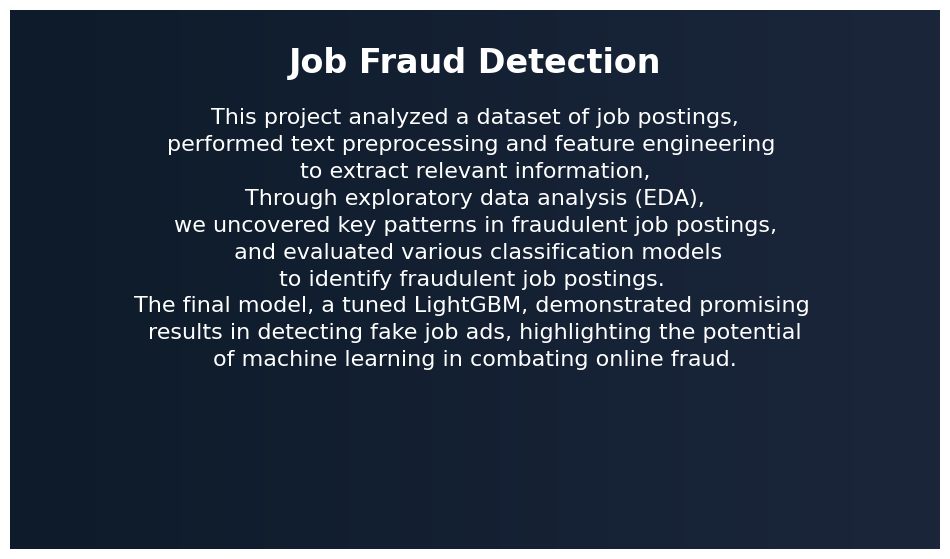

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Function to create a custom dark gradient background
def create_dark_gradient(ax, color1, color2):
    # Define the gradient colors
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))

    # Create a custom colormap
    cmap = LinearSegmentedColormap.from_list('custom_gradient', [color1, color2])

    # Plot the gradient on the axes
    ax.imshow(gradient, aspect='auto', cmap=cmap, extent=ax.get_xlim() + ax.get_ylim())

# Function to add text with custom styling
def add_insights(ax):
    # Add title with custom font size and color
    ax.text(0.5, 0.9, 'Job Fraud Detection', fontsize=24, color='white', ha='center', va='center', fontweight='bold')

    # Add a brief analysis or insights with different styling
    insights = [
        'This project analyzed a dataset of job postings,',
         'performed text preprocessing and feature engineering ',
        'to extract relevant information,',
        'Through exploratory data analysis (EDA),',
        'we uncovered key patterns in fraudulent job postings,',
        ' and evaluated various classification models' ,
        'to identify fraudulent job postings. ',
        'The final model, a tuned LightGBM, demonstrated promising ',
        'results in detecting fake job ads, highlighting the potential' ,
        'of machine learning in combating online fraud.'
    ]

    # Display the insights in a loop
    for i, line in enumerate(insights):
        ax.text(0.5, 0.8 - i*0.05, line, fontsize=16, color='white', ha='center', va='center')

# Create a figure with specific size
fig, ax = plt.subplots(figsize=(12,7))


ax.axis('off')
create_dark_gradient(ax, '#0d1b2a', '#1b263b')
add_insights(ax)
plt.show()